# Project: Wrangle and Analyze Data
By: Steven Melendez
## Table of Contents
<ul>
    <li><a href="#intro">1-Introduction</a></li>
    <li><a href="#sources">2-Data Sources</a></li>
    <li><a href="#gathering">3-Data Gathering</a></li>
    <li><a href="#assessing">4-Data Assessing</a></li>
        <li><a href="#assessingsum">5-Assessing Summary</a></li>
    <li><a href="#cleaning">6-Data Cleaning</a></li>
    <li><a href="#analysis">7-Data Analysis</a></li>
</ul>

<a id='intro'></a>
## 1 - Introduction

In the following project, Twitter data will be gathered and analyzed from the Twitter account <a href = "https://twitter.com/dog_rates?lang=de">"WeRateDogs"</a>. For that, data is gathered via manual download, programmatical download and over an API. Then, the data will be assesed, issues will be identified and subsequently cleaned.

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

Key points to keep in mind when data wrangling for this project:

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* Cleaning includes merging individual pieces of data according to the rules of tidy data.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

<a id='sources'></a>
## 2 - Data Sources


>1. **Name:** WeRateDogs™ Twitter Archive (twitter-archive-enhanced.csv)</li>
><ul>   
>    <li><b>Source:</b> <a href = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv">Udacity</a></li>    
>    <li><b>Version:</b> Latest (Download 07.05.2020)</li>
>    <li><b>Method of gathering:</b> Manual download</li>
></ul>

>2. **Name:** Tweet image predictions (image_predictions.tsv)</li>
><ul>   
>    <li><b>Source:</b> <a href="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv">Udacity</a></li>     
>    <li><b>Version:</b> Latest (Download 07.05.2020)</li>
>    <li><b>Method of gathering:</b> Programmatical download via Requests</li>
></ul>

>3. **Name:** Additional Twitter data (tweet_json.txt)
><ul>   
>    <li><b>Source:</b> <a href = "https://twitter.com/dog_rates">WeRateDogs</a></li>    
>    <li><b>Version</b>: Latest (Gathered 07.05.2020)</li>
>    <li><b>Method of gathering:</b> API via Tweepy</li>
></ul>

<a id='gathering'></a>
## 3 - Data Gathering

#### Import Libraries

In [4]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [5]:
# Import Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import requests
import tweepy
import json
import sqlite3
import seaborn as sns
import re

%matplotlib inline

#### 3.1. WeRateDogs Twitter Archive (twitter-archive-enhanced.csv)
Pandas will be used to read this CSV file, the file called "twitter-archive-enhanced.csv" is loaded in the enviroment.

In [115]:
# Read the data from the CSV
twitter_data = pd.read_csv('twitter-archive-enhanced.csv')

# Show the header
twitter_data.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


#### 3.2. Read tweet image predictions (TSV)
To gather this data we are going to define the file - url, request this url and write the content of the response to a separate file.

In [4]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

#get response
response = requests.get(url)

#write return to an image
with open("image_predictions.tsv", mode = "wb") as file:
    file.write(response.content)

In [5]:
img_pred = pd.read_csv("image_predictions.tsv", sep='\t')

img_pred.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


#### 3.3. Read from the Twitter API (JSON
Gather data via tweepy. This results will stored in a file called "tweet_json.txt".

In [8]:
### Configuration of the credentails for the Twitter API
consumer_key = 'N/A'
consumer_secret = 'N/A'
access_token = 'N/A'
access_token_secret = 'N/A'

# Get the authorization token from the API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Get the API access
api = tweepy.API(auth_handler = auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [9]:
# list of tweet ids from enhanced data set
tweet_ids = twitter_data['tweet_id']

# creating a list for tweets with exceptions/errors 
tweets_error_list = []

# List of tweets
df_tweets = []

# For loop which will add each available tweet json to df_list
for tweet_id in tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json 
        
        favorites = tweet['favorite_count'] # number of favorites for the tweet
        retweets = tweet['retweet_count'] # number of retweets
        user_followers = tweet['user']['followers_count'] # number of followers of the user who tweeted
        user_favourites = tweet['user']['favourites_count'] # number of favourites for the user who tweeted
        date_time = tweet['created_at'] # the timestamp i.e. date and time of creation of the tweet
        # storing it into a data frame df_tweets
        df_tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        tweets_error_list.append(tweet_id)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 _ [{'code

Rate limit reached. Sleeping for: 582


758740312047005698 _ Failed to send request: ('Connection aborted.', OSError("(10054, 'WSAECONNRESET')"))
754011816964026368 _ [{'code': 144, 'message': 'No status found with that ID.'}]
680055455951884288 _ [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 565


676957860086095872 _ Failed to send request: ('Connection aborted.', OSError("(10054, 'WSAECONNRESET')"))


In [101]:
# creating DataFrames
df_tweets_json = pd.DataFrame(df_tweets, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
# saving the dataFrame to file
df_tweets_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [172]:
# Read the saved tweet_json.txt file into a dataframe
api_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

In [173]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2329 non-null   int64 
 1   favorites        2329 non-null   int64 
 2   retweets         2329 non-null   int64 
 3   user_followers   2329 non-null   int64 
 4   user_favourites  2329 non-null   int64 
 5   date_time        2329 non-null   object
dtypes: int64(5), object(1)
memory usage: 109.3+ KB


<a id='assessing'></a>
## 4 - Data Assessing
Quality and Tidiness will be evaluated in this section. 

### Assessing twitter_data

In [116]:
# Show the header
twitter_data.sample(6)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
757,778624900596654080,NaN,NaN,2016-09-21 16:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's a sailor pup. 11/10 would...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778624900...,11,10,Penny,None,None,None,None
1134,728653952833728512,NaN,NaN,2016-05-06 18:33:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coleman. Somebody needs to tell him th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728653952...,8,10,Coleman,None,None,None,None
628,794926597468000259,NaN,NaN,2016-11-05 15:37:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mack. He's rather h*ckin sleepy. Excep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/794926597...,12,10,Mack,None,None,None,None
1675,682242692827447297,NaN,NaN,2015-12-30 16:51:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Samson. He patrols his waters on the b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682242692...,11,10,Samson,None,None,None,None
1868,675166823650848770,NaN,NaN,2015-12-11 04:14:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Arnold. He broke his leg saving a hand...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675166823...,10,10,Arnold,None,None,None,None
1718,680176173301628928,NaN,NaN,2015-12-25 00:00:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is patiently waiting to scare the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680176173...,10,10,None,None,None,pupper,None


During the visual assessment, the following inconsistencies were noted:
- not all tweets could be classified as doggo, floofer, pupper or puppo and all columns contain "None"
- the source contains unnecessary HTML code
- "None" was found in the name column

In [117]:
# Show the info
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Some columns with incorrect datatypes were found: 
- tweet_id should be a str
- timestamp - columns should be datetime objects

In [118]:
# Describe the data set
twitter_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [119]:
# Check for duplicates and null values
sum(twitter_data.tweet_id.duplicated()), sum(twitter_data.tweet_id.isnull())

(0, 0)

In [120]:
twitter_data.tweet_id.nunique()

2356

In [121]:
# Table with the different names
twitter_data.name.value_counts().head(20)

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
an           7
Buddy        7
Bailey       7
Daisy        7
Toby         7
Rusty        6
Bella        6
Name: name, dtype: int64

Name column contains wrong names like "None", "Bo", "a", "the", "an".

In [122]:
# Number of retweeted tweets
sum((twitter_data.retweeted_status_id.isna()) == False)

181

In [123]:
# Count values for 'doggo'
twitter_data.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [124]:
# Count values for 'floofer'
twitter_data.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [125]:
# Count values for 'pupper'
twitter_data.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [126]:
# Count values for 'puppo'
twitter_data.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

### Assessing img_pred

In [127]:
# Show the header
img_pred.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


We can see that:
- the predicitions are sometimes lowercase, sometimes uppercase
- there is an underscore instead of a whitespace between the words
- there are rows with no prediciton of a dog (neither in 1, 2 nor 3)

In [128]:
# Show the info
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- the tweet_id colum should be string

In [129]:
# Show the description
img_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


The best way to find duplicates is to look at the jpg - url. If there are value counts > 1, then this data contains duplicates/retweets.

In [130]:
img_pred.jpg_url.value_counts().head(10)

https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg    2
https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg    2
https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg    2
https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg    2
https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg    2
https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg    2
https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg    2
https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg    2
https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg    2
Name: jpg_url, dtype: int64

In [131]:
# Check for duplicates and null tweets
sum(img_pred.tweet_id.duplicated()), sum(img_pred.tweet_id.isnull())

(0, 0)

### Assessing `api_data`

In [132]:
# Show the header of 'api_data'
api_data.head()

,tweet_id,favorites,retweets,user_followers
0,892420643555336193,35983,7659,8783683
1,892177421306343426,31066,5661,8783683
2,891815181378084864,23376,3754,8783683
3,891689557279858688,39285,7825,8783683
4,891327558926688256,37521,8423,8783683


In [133]:
# Show the info of 'api_data'
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2329 non-null   int64
 1   favorites       2329 non-null   int64
 2   retweets        2329 non-null   int64
 3   user_followers  2329 non-null   int64
dtypes: int64(4)
memory usage: 72.9 KB


In [134]:
# Show the description of 'api_data'
api_data.describe()

,tweet_id,favorites,retweets,user_followers
count,2.329000e+03,2329.000000,2329.000000,2.329000e+03
mean,7.419285e+17,7521.401889,2687.247746,8.783685e+06
std,6.824683e+16,11676.522644,4543.686392,6.231374e+01
min,6.660209e+17,0.000000,1.000000,8.783626e+06
25%,6.782786e+17,1307.000000,543.000000,8.783684e+06
50%,7.182469e+17,3268.000000,1258.000000,8.783688e+06
75%,7.986731e+17,9213.000000,3128.000000,8.783699e+06
max,8.924206e+17,155264.000000,77231.000000,8.784370e+06


In [135]:
# Check if there are duplicated and nulls tweets
sum(api_data.tweet_id.duplicated()), sum(api_data.tweet_id.isnull())

(0, 0)

<a id='#assessingsum'></a>
## 5 - Assessing Summary
Quality and Tidiness issues will be listes in this section

#### 5.1 - Quality Issues

* Quality Issue # 1: In the dataframe twitter_data only 2075 tweetIds have images
* Quality Issue # 2: In the dataframe twitter_data has some wrong or multiple URLs
* Quality Issue # 3: In the dataframe twitter_data some dog names are listed such as (like "a", "an", "by", etc.)
* Quality Issue # 4: In the dataframe twitter_data there are some tweets that were retweets from other tweets
* Quality Issue # 5: In the dataframe img_pred some of the predictions are not dog related.
* Quality Issue # 6: In the dataframe twitter_data the columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp they has several rows with missing values.
* Quality Issue # 7: In the dataframe twitter_data the column as data type object instead of datetime64
* Quality Issue # 8: In the dataframes twitter_data, img_pred the tweet_id has the data type int instead of string.

#### 5.2 - Tidiness Issues

* Tidiness Issue # 1: The dog stage columns in twitter_archive can be arranged into a single column
* Tidiness Issue # 2: All three dataframes can be combined into one single dataframe.

<a id='cleaning'></a>
## 6 - Data Cleaning

* Cleaning process consists of three steps: Define, code & Test. 
* First we define how to tackle the issue. Then, we code to resolve the issue and finally we test our code.
* As a result, each issue listed in the previous section will be solved using this approach.

In [136]:
# Create a copy of all the original dataframes
twitter_data_clean = twitter_data.copy()
img_pred_clean = img_pred.copy()
api_data_clean = api_data.copy()

#### Quality Issue # 1

#### Define
**Problem:** In the dataframe twitter_data only 2075 tweetIds have images

**Solution:** Remove the tweets without image predictions.
#### Code

In [137]:
# Check the number of rows in "twitter_data" before the removal of tweets without predictions
len(twitter_data_clean)

2356

In [138]:
# Create and array with the list of all the tweets that we have image prediciton
list_tweet_id = img_pred_clean.tweet_id

# Filter only the tweets with predictions
twitter_data_clean.query('tweet_id in @list_tweet_id', inplace = True)

#### Test

In [139]:
# Check the number of rows in "twitter_data" after removing the tweets without predictions
len(twitter_data_clean)

2075

#### Quality Issue # 2

#### Define
**Problem:** In the dataframe twitter_data has some wrong or multiple URLs

**Solution:** A valid assumption is that URL format is always the same and it only change the ID of each tweet. Using regex valid URLs will be extracted and copied into a new column.
#### Code

In [140]:
# Check the first 10 expanded_urls
twitter_data_clean.expanded_urls.head(10)

0    https://twitter.com/dog_rates/status/892420643...
1    https://twitter.com/dog_rates/status/892177421...
2    https://twitter.com/dog_rates/status/891815181...
3    https://twitter.com/dog_rates/status/891689557...
4    https://twitter.com/dog_rates/status/891327558...
5    https://twitter.com/dog_rates/status/891087950...
6    https://gofundme.com/ydvmve-surgery-for-jax,ht...
7    https://twitter.com/dog_rates/status/890729181...
8    https://twitter.com/dog_rates/status/890609185...
9    https://twitter.com/dog_rates/status/890240255...
Name: expanded_urls, dtype: object

In [141]:
# Extract url based with regex
twitter_data_clean['clean_urls'] = twitter_data_clean['expanded_urls'].str.\
                                   extract('(https://twitter.com/dog_rates/status/\d{1,18}/photo/1)', expand=True)

In [142]:
# Remove the column "expanded_urls"
twitter_data_clean.drop('expanded_urls', axis = 1, inplace = True)

#### Test

In [143]:
# Check the first 10 clean_urls
twitter_data_clean.clean_urls.head(10)

0    https://twitter.com/dog_rates/status/892420643...
1    https://twitter.com/dog_rates/status/892177421...
2    https://twitter.com/dog_rates/status/891815181...
3    https://twitter.com/dog_rates/status/891689557...
4    https://twitter.com/dog_rates/status/891327558...
5    https://twitter.com/dog_rates/status/891087950...
6    https://twitter.com/dog_rates/status/890971913...
7    https://twitter.com/dog_rates/status/890729181...
8    https://twitter.com/dog_rates/status/890609185...
9    https://twitter.com/dog_rates/status/890240255...
Name: clean_urls, dtype: object

#### Quality Issue # 3

#### Define
**Problem:** In the dataframe twitter_data some dog names are listed such as (like "a", "an", "by", etc.).

**Solution:** A valid assumption is that dog names start with a upper case letter. Therefore, all the names that starts with a lower case I will have no dog names.
#### Code

In [144]:
# Show the list of names that start with lower case
twitter_data_clean[twitter_data_clean['name'].str[0].str.islower()].name.head(10)

22           such
56              a
169         quite
193         quite
369           one
542    incredibly
649             a
759            an
801             a
819          very
Name: name, dtype: object

In [145]:
# Replace all the names that they start with lower case with "No name"
twitter_data_clean.loc[twitter_data_clean['name'].str[0].str.islower(), 'name'] = "No name"

# Replace all the names that they are "None" with "No name"
twitter_data_clean.loc[twitter_data_clean['name'] == "None", 'name'] = "No name"

#### Test

In [146]:
# Check if there are any name that starts with a lower case
len(twitter_data_clean[twitter_data_clean['name'].str[0].str.islower()]) == 0

True

In [147]:
# Show the first 10 names
twitter_data_clean.name.value_counts().head(10)

No name    678
Charlie     11
Penny       10
Oliver      10
Lucy        10
Tucker      10
Cooper      10
Bo           8
Sadie        8
Winston      8
Name: name, dtype: int64

#### Quality Issue # 4

#### Define
**Problem:** In the dataframe twitter_data there are some tweets that were retweets from other tweets

**Solution:** Remove the tweets that they have a tweet id in the column retweeted_status_id
#### Code

In [148]:
# First check the quantiy of retweets
sum((twitter_data_clean.retweeted_status_id.notnull()))

81

In [149]:
# Check the number of tweets in the dataframe
twitter_data_clean.shape[0]

2075

In [150]:
# First check how many rows they are retweets
twitter_data_clean = twitter_data_clean[twitter_data_clean.retweeted_status_id.isnull()]

In [151]:
# Check again the number of tweets in the dataframe after removing the retweets
twitter_data_clean.shape[0]

1994

In [152]:
#### Test

In [153]:
# Check if there are not retweets
sum((twitter_data_clean.retweeted_status_id.notnull())) == 0

True

#### Quality Issue # 5

#### Define
**Problem:**  In the dataframe img_pred some of the predictions are not dog related.

**Solution:** In the case that the prediction is not a dog, write "Not a dog".
#### Code

In [154]:
# Show the number of rows that are not dog for each prediction
len(img_pred_clean) - img_pred_clean.p1_dog.sum(),\
len(img_pred_clean) - img_pred_clean.p2_dog.sum(),\
len(img_pred_clean) - img_pred_clean.p3_dog.sum()

(543, 522, 576)

In [155]:
# Show the number of rows that are not dog for each prediction
len(img_pred_clean.query('p1 == "Not a dog"')),\
len(img_pred_clean.query('p2 == "Not a dog"')),\
len(img_pred_clean.query('p3 == "Not a dog"'))

(0, 0, 0)

In [156]:
# Replace all the predictions that are not a dog breed for "Not a dog"
img_pred_clean.loc[img_pred_clean.p1_dog == False, 'p1'] = "Not a dog"
img_pred_clean.loc[img_pred_clean.p2_dog == False, 'p2'] = "Not a dog"
img_pred_clean.loc[img_pred_clean.p3_dog == False, 'p3'] = "Not a dog"

#### Test

In [157]:
# Show the number of rows that are not dog for each prediction
len(img_pred_clean.query('p1 == "Not a dog"')),\
len(img_pred_clean.query('p2 == "Not a dog"')),\
len(img_pred_clean.query('p3 == "Not a dog"'))

(543, 522, 576)

#### Quality Issue # 6

#### Define
**Problem:**  In the dataframe twitter_data the columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp they has several rows with missing values.

**Solution:** These columns contains several rows with missing values. As a result, these columns will be removed.
#### Code

In [158]:
# Nº of columns in "twitter_data" before removing the 5 columns
len(list(twitter_data_clean))

17

In [159]:
# Remove the column "in_reply_to_status_id"
twitter_data_clean.drop('in_reply_to_status_id', axis = 1, inplace = True)

# Remove the column "in_reply_to_user_id"
twitter_data_clean.drop('in_reply_to_user_id', axis = 1, inplace = True)

# Remove the column "retweeted_status_id"
twitter_data_clean.drop('retweeted_status_id', axis = 1, inplace = True)

# Remove the column "retweeted_status_user_id"
twitter_data_clean.drop('retweeted_status_user_id', axis = 1, inplace = True)

# Remove the column "retweeted_status_timestamp"
twitter_data_clean.drop('retweeted_status_timestamp', axis = 1, inplace = True)

#### Test

In [160]:
# Nº of columns in "twitter_data" after removing the 5 columns
len(list(twitter_data_clean))

12

#### Quality Issue # 7

#### Define
**Problem:**  In the dataframe twitter_data the column as data type object instead of datetime64

**Solution:** Change the datatype of the column timestamp to datetime64
#### Code

In [161]:
# Check the data type of "timestamp" before change the data type
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1994 non-null   int64 
 1   timestamp           1994 non-null   object
 2   source              1994 non-null   object
 3   text                1994 non-null   object
 4   rating_numerator    1994 non-null   int64 
 5   rating_denominator  1994 non-null   int64 
 6   name                1994 non-null   object
 7   doggo               1994 non-null   object
 8   floofer             1994 non-null   object
 9   pupper              1994 non-null   object
 10  puppo               1994 non-null   object
 11  clean_urls          1920 non-null   object
dtypes: int64(3), object(9)
memory usage: 202.5+ KB


In [162]:
# Change the format of the column "timestamp" to datetime
twitter_data_clean['timestamp'] = pd.to_datetime(twitter_data_clean['timestamp'])

#### Test

In [163]:
# Check the data type of "timestamp" after change the data type
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   rating_numerator    1994 non-null   int64              
 5   rating_denominator  1994 non-null   int64              
 6   name                1994 non-null   object             
 7   doggo               1994 non-null   object             
 8   floofer             1994 non-null   object             
 9   pupper              1994 non-null   object             
 10  puppo               1994 non-null   object             
 11  clean_urls          1920 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

#### Quality Issue # 8

#### Define
**Problem:**  In the dataframes twitter_data, img_pred the tweet_id has the data type int instead of string.

**Solution:** Change the data type of the column tweet_id from int to string in all 3 dataframes
#### Code

In [164]:
# Check the data type of "tweet_id" before change the data type
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   rating_numerator    1994 non-null   int64              
 5   rating_denominator  1994 non-null   int64              
 6   name                1994 non-null   object             
 7   doggo               1994 non-null   object             
 8   floofer             1994 non-null   object             
 9   pupper              1994 non-null   object             
 10  puppo               1994 non-null   object             
 11  clean_urls          1920 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [165]:
# Check the data type of "tweet_id" before change the data type
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [166]:
# Check the data type of "tweet_id" before change the data type
api_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2329 non-null   int64
 1   favorites       2329 non-null   int64
 2   retweets        2329 non-null   int64
 3   user_followers  2329 non-null   int64
dtypes: int64(4)
memory usage: 72.9 KB


In [167]:
# Change the datatype of the column "tweet_id" to string
twitter_data_clean['tweet_id'] = twitter_data_clean['tweet_id'].astype(str)
img_pred_clean['tweet_id'] = img_pred_clean['tweet_id'].astype(str)
api_data_clean['tweet_id'] = api_data_clean['tweet_id'].astype(str)

#### Test

In [168]:
# Check the data type of "tweet_id" after change the data type
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   rating_numerator    1994 non-null   int64              
 5   rating_denominator  1994 non-null   int64              
 6   name                1994 non-null   object             
 7   doggo               1994 non-null   object             
 8   floofer             1994 non-null   object             
 9   pupper              1994 non-null   object             
 10  puppo               1994 non-null   object             
 11  clean_urls          1920 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

In [169]:
# Check the data type of "tweet_id" after change the data type
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [170]:
# Check the data type of "tweet_id" after change the data type
api_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2329 non-null   object
 1   favorites       2329 non-null   int64 
 2   retweets        2329 non-null   int64 
 3   user_followers  2329 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 72.9+ KB


In [174]:
api_data.drop(['user_favourites','date_time'], axis=1, inplace=True)
api_data.head()

,tweet_id,favorites,retweets,user_followers
0,892420643555336193,35983,7659,8783683
1,892177421306343426,31066,5661,8783683
2,891815181378084864,23376,3754,8783683
3,891689557279858688,39285,7825,8783683
4,891327558926688256,37521,8423,8783683


#### Tidiness Issue # 1

#### Define
**Problem:** The dog stage columns in twitter_archive can be arranged into a single column
    
**Solution:** Remove the 4 columns and put all the data in a unique column called `dogo_stage`
#### Code

In [175]:
# Count values for 'doggo'
twitter_data_clean.doggo.value_counts()

None     1920
doggo      74
Name: doggo, dtype: int64

In [176]:
# Count values for 'floofer'
twitter_data_clean.floofer.value_counts()

None       1986
floofer       8
Name: floofer, dtype: int64

In [177]:
# Count values for 'pupper'
twitter_data_clean.pupper.value_counts()

None      1782
pupper     212
Name: pupper, dtype: int64

In [178]:
# Count values for 'puppo'
twitter_data_clean.puppo.value_counts()

None     1971
puppo      23
Name: puppo, dtype: int64

In [179]:
# Replace all the "None" to ""
twitter_data_clean.doggo.replace('None', '', inplace = True)
twitter_data_clean.floofer.replace('None', '', inplace = True)
twitter_data_clean.pupper.replace('None', '', inplace = True)
twitter_data_clean.puppo.replace('None', '', inplace = True)

In [180]:
# Create a new column by summing all the values from the 4 columns
twitter_data_clean['dogo_stage'] = twitter_data_clean.doggo + twitter_data_clean.floofer +\
                                   twitter_data_clean.pupper + twitter_data_clean.puppo

In [181]:
# Different values of the new column "dogo_stage"
twitter_data_clean.dogo_stage.value_counts()

                1688
pupper           203
doggo             63
puppo             22
doggopupper        9
floofer            7
doggopuppo         1
doggofloofer       1
Name: dogo_stage, dtype: int64

Some tweets contains combinations of "doggopuppo", "doggopupper", "doggofloofer".  Therefore, these categories shall be removed.

In [182]:
# Remove the dogo_stage of the dogs that they have multiple stages
twitter_data_clean.dogo_stage.replace('doggopupper', '', inplace = True)
twitter_data_clean.dogo_stage.replace('doggopuppo', '', inplace = True)
twitter_data_clean.dogo_stage.replace('doggofloofer', '', inplace = True)

# Replace all the tweets that they don't have doggo with "No doggo"
twitter_data_clean.dogo_stage.replace('', 'No doggo', inplace = True)

In [183]:
# Number of columns before removing the 4 stage columns
len(list(twitter_data_clean))

13

In order to complete the process, 4 stages will be removed.

In [184]:
# Remove the column "doggo"
twitter_data_clean.drop('doggo', axis = 1, inplace = True)

# Remove the column "floofer"
twitter_data_clean.drop('floofer', axis = 1, inplace = True)

# Remove the column "pupper"
twitter_data_clean.drop('pupper', axis = 1, inplace = True)

# Remove the column "puppo"
twitter_data_clean.drop('puppo', axis = 1, inplace = True)

#### Test

In [185]:
# Different values of the new column "dogo_stage"
twitter_data_clean.dogo_stage.value_counts()

No doggo    1699
pupper       203
doggo         63
puppo         22
floofer        7
Name: dogo_stage, dtype: int64

In [186]:
# Number of columns after removing the 4 stage columns
len(list(twitter_data_clean))

9

#### Tidiness Issue # 2

#### Define
**Problem:** All three dataframes can be combined into one single dataframe.
    
**Solution:** A new dataframe called `master_file` will be created with the 3 dataframes using the column `tweet_id`.
#### Code

In [187]:
#Check the number of rows
len(twitter_data_clean), len(img_pred_clean), len(api_data_clean)

(1994, 2075, 2329)

In [188]:
# Check columns names in all the dataframes
all_columns = pd.Series(list(twitter_data_clean) + list(img_pred_clean) + list(api_data_clean))
all_columns[all_columns.duplicated()]

9     tweet_id
21    tweet_id
dtype: object

In [189]:
# Merge the 3 dataframes using the column "tweet_id" as primary key.
master_file = pd.merge(twitter_data_clean, img_pred_clean, on=['tweet_id'], how='inner')
master_file = pd.merge(master_file, api_data_clean, on=['tweet_id'], how='inner')

#### Test

In [190]:
# Show the first 6 lines of master_file
master_file.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,clean_urls,dogo_stage,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,user_followers
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://twitter.com/dog_rates/status/892420643...,No doggo,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,Not a dog,0.085851,False,Not a dog,0.076110,False,35983,7659,8783683
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,https://twitter.com/dog_rates/status/892177421...,No doggo,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,papillon,0.068957,True,31066,5661,8783683
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://twitter.com/dog_rates/status/891815181...,No doggo,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,23376,3754,8783683
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://twitter.com/dog_rates/status/891689557...,No doggo,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,Labrador_retriever,0.168086,True,Not a dog,0.040836,False,39285,7825,8783683
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,https://twitter.com/dog_rates/status/891327558...,No doggo,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,37521,8423,8783683


In [191]:
# Show the information of "master_file"
master_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 1984
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1985 non-null   object             
 1   timestamp           1985 non-null   datetime64[ns, UTC]
 2   source              1985 non-null   object             
 3   text                1985 non-null   object             
 4   rating_numerator    1985 non-null   int64              
 5   rating_denominator  1985 non-null   int64              
 6   name                1985 non-null   object             
 7   clean_urls          1912 non-null   object             
 8   dogo_stage          1985 non-null   object             
 9   jpg_url             1985 non-null   object             
 10  img_num             1985 non-null   int64              
 11  p1                  1985 non-null   object             
 12  p1_conf             1985 non-null 

### Storing data into a CSV file

The master_file will be stored in a CSV file.

In [192]:
# Save the dataframe "master_file" into a CSV file
master_file.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

<a id='analysis'></a>
## 7 - Data Analysis

Data analysis will be conducted in this section.

In [8]:
# Describe the data
master_file.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorites,retweets,user_followers
count,1.985000e+03,1985.000000,1985.000000,1985.000000,1985.000000,1.985000e+03,1.985000e+03,1985.000000,1985.000000,1.985000e+03
mean,7.356443e+17,12.282116,10.534509,1.203526,0.593098,1.345244e-01,6.040358e-02,8231.479597,2440.813098,8.783683e+06
std,6.741119e+16,41.591657,7.337208,0.561615,0.272006,1.006043e-01,5.093073e-02,12118.205959,4366.239811,5.828337e+01
min,6.660209e+17,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,70.000000,11.000000,8.783626e+06
25%,6.758209e+17,10.000000,10.000000,1.000000,0.360465,5.405530e-02,1.624560e-02,1760.000000,544.000000,8.783684e+06
50%,7.083495e+17,11.000000,10.000000,1.000000,0.587101,1.175660e-01,4.965610e-02,3721.000000,1182.000000,8.783688e+06
75%,7.873980e+17,12.000000,10.000000,1.000000,0.843911,1.952180e-01,9.193000e-02,10225.000000,2777.000000,8.783699e+06
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,155264.000000,77231.000000,8.784370e+06


In [9]:
# Show information
master_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1985 non-null   int64  
 1   timestamp           1985 non-null   object 
 2   source              1985 non-null   object 
 3   text                1985 non-null   object 
 4   rating_numerator    1985 non-null   int64  
 5   rating_denominator  1985 non-null   int64  
 6   name                1985 non-null   object 
 7   clean_urls          1912 non-null   object 
 8   dogo_stage          1985 non-null   object 
 9   jpg_url             1985 non-null   object 
 10  img_num             1985 non-null   int64  
 11  p1                  1985 non-null   object 
 12  p1_conf             1985 non-null   float64
 13  p1_dog              1985 non-null   bool   
 14  p2                  1985 non-null   object 
 15  p2_conf             1985 non-null   float64
 16  p2_dog

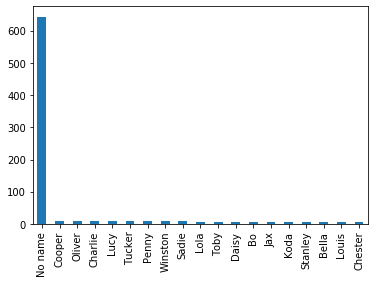

In [10]:
master_file.name.value_counts()[0:19].plot(kind='bar');

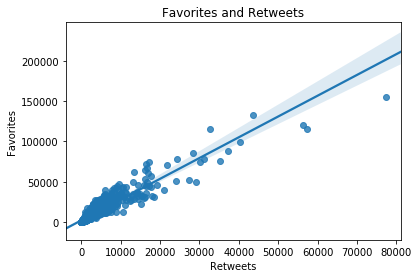

In [12]:
graph = sns.regplot(x=master_file.retweets, y=master_file.favorites)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
# sns.plt.show()
fig = graph.get_figure()
fig.savefig('scatterplot.png')

The chart above shows a high correlation between favorites and retweets.

In [199]:
# Percentage of dogs types
# Count of tweets with each doggo category
master_file.dogo_stage.value_counts()

No doggo    1691
pupper       203
doggo         62
puppo         22
floofer        7
Name: dogo_stage, dtype: int64

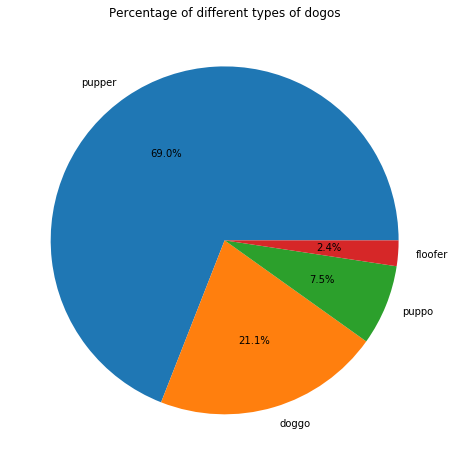

In [200]:
# Create a pie plot with the different percentages of dogos
master_file.query('dogo_stage != "No doggo"').dogo_stage.value_counts().plot.pie(autopct='%1.1f%%', figsize=(8,8));
plt.title('Percentage of different types of dogos')
plt.ylabel('')
plt.show()

The highest proportion of dogos type is "Pupper" with 69%.

In [205]:
# Setup function needed
sns.set(rc={'figure.figsize':(15,8)})
def set_label(xlabel, ylabel):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

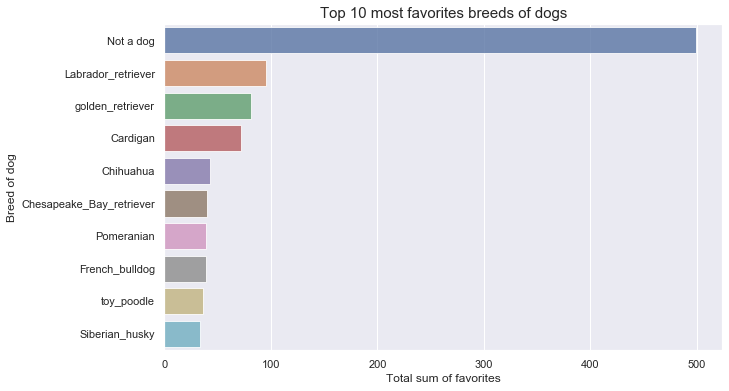

In [206]:
# Top Dog_stage values based on the count
cnt_srs = master_file['p2'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Total sum of favorites', fontsize=12)
plt.ylabel('Breed of dog', fontsize=12)
plt.title("Top 10 most favorites breeds of dogs", fontsize=15)
plt.show()

The chart above, shows "Labrador Retriever" is the most popular dog breed.

In [13]:
# Create HTML file
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

4294967295

### References

The link below are reference of works used to develop this deliverable.  Some lines of codes and rationales where used.

* https://github.com/shravankoninti/Udacity_DataAnalyst/blob/master/Project-4%20-%20Data_Wrangling/wrangle_act.ipynb
* https://github.com/DataLind/Udacity-Data-Analyst-Nanodegree/blob/master/P3-Analyze-Twitter-Data/wrangle_act.ipynb